# Statistics 2

## Central Limit Theorem

In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt 
from math import exp,factorial,sqrt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/fazil/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sqrt', 'exp']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


This section demonstrates the Central Limit Theorem by comparing
$$S_n=\frac{1}{\sqrt{n}}\sum_{i=1}^n \left({X_i-\mu}\right)$$
with the normal distribution $\mathcal{N}(0,\sigma^2)$
where $X_i$ are iid random variables and $\mu=E[X_i]$, $\sigma^2=V(X_i)$.

The code below plots the probability distribution function (PDF) of $S_n$ and $\mathcal{N}(0,\sigma^2)$ when $X_i$ follows uniform distribution on $[a,b]$. Observe how quickly the distribution of $S_n$ converges to normal. 

In [2]:
# plot the pdf of 1/n(\sum_{i=1}^n X_i), X_i~U_{a,b}
def uniform_sample_counts(a, b, k, n):
    X = random.uniform(a-(a+b)/2, b-(a+b)/2, [k,n])  # generate a k by n matrix of uniform random numbers
    S = sum(X, axis=0)/sqrt(k)
    return S

def uniform_plot_hist(s,k,h):
    a = s[0]
    b = s[1]
    if h > 0:
        n = h
        counts = uniform_sample_counts(a,b,k,n)
        hist(counts, bins=40, normed=1, label="Histogram of emphirical means");
    
def uniform_mean_pdf(s,n,h):
    a = s[0]
    b = s[1]
    d = 10.0/1000;
    x = linspace(-4.99,5,1000)
    if a < b:
        y = (1.0*(x>=(a-b)/2))*(1.0*(x<=(b-a)/2))/(b-a)
        z = y
        for j in range(2,n+1):
            t = [item/(j-1) for item in z for i in range(j-1)]
            z = [0,] + convolve(y,t).tolist()
            z = [i*d for i in z]
            z = sum(reshape(z,(1000,j)),axis=1)
        sc = int(n/sqrt(n))
        rem = n/sqrt(n)-sc
        z = [item/(rem+sc) for item in z for i in range(sc+random.binomial(1,rem))]
        x = linspace(-d*len(z)/2,d*len(z)/2,len(z))
        close()
        plot(x, z,label="Distribution of the mean")
        xlim([-5,5])
        title('PDF and histogram of ${Z}_n$ with n=%d'%n)
        xlabel('$x$')
        ylabel('$f_{S_n}(x)$')
        
        var = (b-a)**2/12
        p = linspace(-5,5,1000)
        q = [exp(-i**2/(2*var))/(sqrt(2*pi*var)) for i in p]
        plot(p,q,label="Gaussian distribution")
        uniform_plot_hist(s,n,h)
        xlim([-5,5])
        plt.legend()
        grid()
        
        
w=widgets.FloatRangeSlider(
    description = "[a, b]",
    value=[2, 8],
    min=0.02,
    max=9.98,
    step=0.01,
    continuous_update = False)
widgets.interact(
    uniform_mean_pdf,
    s=w,
    n=widgets.IntSlider(min=1, max=10,description='n:', step=1, value=1),
    h=widgets.IntSlider(min=0, max=10000,description='samples :', step=50, value=0))

interactive(children=(FloatRangeSlider(value=(2.0, 8.0), continuous_update=False, description='[a, b]', max=9.…

<function __main__.uniform_mean_pdf(s, n, h)>

The code below plots the probability distribution function (PDF) of $S_n$ and $\mathcal{N}(0,\sigma^2)$ when the $X_i$ follow exponential distribution with parameter $\lambda$. Again observe the high convergence speed.

In [3]:
# plot the pdf of 1/n(\sum_{i=1}^n X_i), X_i~Exp_{lam}
def exp_sample_counts(lam,k,n):
    X= random.exponential(1.0/lam,[k,n])-1.0/lam  # generate a k by n matrix of uniform random numbers
    S=sum(X,axis=0)/sqrt(k)
    return S

def exp_plot_hist(lam,k,h):
    lam
    if h>0:
        n=h
        counts=exp_sample_counts(lam,k,n)
        hist(counts,bins=40,normed=1,label="Histogram of emphirical means")
    
def exponential_mean_pdf(lam,n,h):
    d=0.01
    x=linspace(d,5,500)
    z=[(lam**n)*((i*sqrt(n))**(n-1))*exp(-lam*(i*sqrt(n)))/(factorial(n-1))*sqrt(n) for i in x]
    x=linspace(d-n/(sqrt(n)*lam),5-n/(sqrt(n)*lam),500)
    close()
    plot(x, z, label="Distribution of the Mean")
    #plot([1.0/lam, 1.0/lam], [0, 2], 'g--', linewidth = 2.0)
    title('PDF and histogram of ${Z}_n$ with n=%d $\lambda$=%1.2f'%(n,lam), fontsize = 20)
    xlabel('$x$', fontsize = 20)
    ylabel('$f_{S_n}(x)$', fontsize = 20)
    
    var = 1.0/(lam**2)
    p = linspace(-5,5,1000)
    q = [exp(-i**2/(2*var))/(sqrt(2*pi*var)) for i in p]
    plot(p,q,label="Gaussian distribution")
    xlim([-5,5])
    ylim([0,1.3])
    grid()
    
    exp_plot_hist(lam,n,h)

widgets.interact(
    exponential_mean_pdf,
    lam=widgets.FloatSlider(min=1, max=3,description='$\lambda$:', step=0.1, value=2),
    n=widgets.IntSlider(min=1, max=30,description='n:', step=1, value=1),
    h=widgets.IntSlider(min=0, max=10000,description='s:', step=50, value=0))

interactive(children=(FloatSlider(value=2.0, description='$\\lambda$:', max=3.0, min=1.0), IntSlider(value=1, …

<function __main__.exponential_mean_pdf(lam, n, h)>

## Standart Error

The Standard Error (SE) measures how spread the distribution is from the sample mean.

$$ SE = \frac{\sigma}{\sqrt{n}}$$

## Sampling

**Non-Representative Sampling**

 * Convenience Sampling: Pick samples that are most convenient, like the top of a shelf or people that can be easily approached.

 * Haphazard Sampling: Pick samples without thinking about it. This often gives the illusion take you are picking out samples at random.

 * Purposive Sampling: Pick samples for a specific purpose. An example is to focus on extreme cases. This can be useful but is limited because it doesn't allow you to make statements about the whole population.

**Representative Sampling**

 * Simple Random Sampling: Pick samples (psuedo)randomly.

 * Systematic Sampling: Pick samples with a fixed interval. For example every 10th sample (0, 10, 20, etc.).

 * Stratified Sampling: Pick the same amount of samples from different groups (strata) in the population.

 * Cluster Sampling: Divide the population into groups (clusters) and pick samples from those groups.

### Estimating the Mean

We demonstrate how the sample mean approximates the distribution mean. 

#### Convergence of Sample Mean

If we take $n$ samples, $X_1,\ldots, X_n$, the sample mean $\overline X=\frac{X_1+\ldots+X_n}n$ converges to the distribution mean $\mu$. The following program demonstrate that.

In [10]:
from scipy.stats import norm, uniform
import numpy as np

In [11]:
def Sample_Mean(n,r):
# n: sample size
# r: number of experiments

    figure(figsize=(20,10))
    xlim([1,n])
    ylim([-1, 1])
    grid()
    
    x = list(range(1,n+1))
    z = 1.0/np.sqrt(x)
    plot(x, z,'k--')
    plot(x, negative(z), 'k--')
    
    for i in range(r):
        y = random.normal(0, 1, n)
        m = divide(cumsum(y), x)
        plot(x, m, alpha=0.5)

The following graph shows how the sample mean $\overline X$ converges to the distribution mean $\mu$. The underlying distribution is standard normal. $n$ is the number of samples, and $r$ is the number of experiments.

Recall that the sample mean's expected value is always $\mu$, which here is 0, and that its standard deviation is $\frac\sigma{\sqrt n}$, which here is $\frac1{\sqrt n}$. The dashed black line shows this value and its negation. 

Observe:
* When the sample size $n$ increases, all curves get closer to the distribution mean 0.
* The $r$ sample means are typically bounded between the positive and negative standard deviations.

In [12]:
widgets.interact(Sample_Mean,
                 n=widgets.IntSlider(min=10, max=1000,description='sample size', step=10, value=100),
                 r=widgets.IntSlider(min=1, max=10,description='experiments', step=1, value=5))

interactive(children=(IntSlider(value=100, description='sample size', max=1000, min=10, step=10), IntSlider(va…

<function __main__.Sample_Mean(n, r)>

### Distribution of the sample mean

Next consider the distribution of the sample mean $\overline X$. In this example the underlying distribution is either uniform or standard Normal (you can comment the code to choose). You can see that as the sample size $n$ increases the distribution of $\overline X$ becomes uniform, as predicted by the central limit theorem. If you sample from the normal distribution then $\overline X$ is exactly normal for any $n$. 

In [ ]:
@widgets.interact(n=(1,30))
def Normal_Mean(n):
# n: sample size
# s: number of experiments
    figure(figsize=(20,10))
    title('histogram of sample means with sample size n=%d'%n,fontsize = 15)
    xlabel('$\overline{X}$',fontsize = 15)
    ylabel('frequency', fontsize = 15)
    grid()

    s = 100000
    
    x = linspace(-4,4,1000)
    #y = [norm.pdf(i,0,1) for i in x]
    y = [uniform.pdf(i,0,1) for i in x]
    plot(x,y)
    
    #X = random.normal(0,1,[n,s])
    X= random.uniform(0,1,[n,s])
    M = sum(X,axis=0)/n
    hist(M,bins=40,normed=1)

## Variance Estimation

Next we estimate the variance. 

### Raw (biased) Estimator

We start with the raw estimate that uses the intuitive normalization by $n$. We show experimentally that its expected value is $\frac{n-1}n\sigma^2$.

In this example the underlying distribution is standard Normal. The green line shows the true distribution variance, here 1. The red line shows the average of the "raw" (biased) sample variance. Observe that as you change $n$, the red line is roughly at $\frac{n-1}n$.

In [13]:
def Normal_Variance(n,df):
# n: sample size
# s: number of experiments
# df: degree of freedom
#     df=0: calculate "raw" variance 
#     df=1: calculate unbiased variance 
    figure(figsize=(20,10))
    xlim([0,4])
    
    s = 1000000
    X = random.normal(0,1,[n,s])
    V = var(X,axis=0,ddof=df)
    v = mean(V)
    
    plot([v,v], [0, 3], 'r--', linewidth = 2.0)
    hist(V,bins=60,normed=1);

    plot([1,1], [0, 3], 'g:', linewidth = 2.0)
    ylabel('frequency', fontsize = 15)
    grid()

In [14]:
@widgets.interact(n=(2,20))
def Raw_Variance(n):
    Normal_Variance(n,0)
    title('histogram of "raw" sample variance with sample size n=%d'%n,fontsize = 15)
    xlabel('"$S^2$"', fontsize = 15)


interactive(children=(IntSlider(value=11, description='n', max=20, min=2), Output()), _dom_classes=('widget-in…

### Unbiased Variance Estimator

Next we apply the Bessel correction, where instead of normalizing by $n$, we normalize by $n-1$. We show experimentally that this estimator is unbiased.

Again, the underlying distribution is standard Normal. The red line shows the expectation of the unbiased sample variance and the blue line shows the true distribution variance. And we can see that those two lines overlap for all $n$.

In [15]:
@widgets.interact(n=(2,20))
def Unbiased_Variance(n):
    Normal_Variance(n,1)
    title('histogram of unbiased sample variance with sample size n=%d'%n,fontsize = 15)
    xlabel('$S^2$', fontsize = 15)

interactive(children=(IntSlider(value=11, description='n', max=20, min=2), Output()), _dom_classes=('widget-in…

## Estimating the standad deviation

We apply the standard standard-deviation estimator and show that on average it underestimates $\sigma$. 

In [16]:
def Normal_SD(n):
# n: sample size
# s: number of experiments

    figure(figsize=(20,10))
    xlim([0,3])
    title('histogram of sample standard deviation with sample size n=%d'%n,fontsize = 15)
    xlabel('$\hat{\sigma}$', fontsize = 15)
    
    s = 1000000
    X = random.normal(0,1,[n,s])
    V = np.sqrt(var(X,axis=0,ddof=1))
    v = np.mean(V)
    
    plot([v,v], [0, 3], 'r--', linewidth = 2.0)
    hist(V,bins=60,normed=1);

    plot([1,1], [0, 3], 'g:', linewidth = 2.0)
    ylabel('frequency', fontsize = 15)
    grid() 

We continue to use the standard normal as the underlying distribution. The green line shows the distribution's true standard deviation $\sigma=1$. The red line shows the average of the sample standard deviation (square root of unbiased sample variance). Observe that the sample standard deviation underestimates $\sigma$, but this underestimate shrinks as you increase $n$.

In [17]:
widgets.interact(
    Normal_SD,
    n = widgets.IntSlider(min=2, max=10,description='n=', step=1, value=2))

interactive(children=(IntSlider(value=2, description='n=', max=10, min=2), Output()), _dom_classes=('widget-in…

<function __main__.Normal_SD(n)>

## Hypothesis Testing 

In the last kernel, we have looked at how to estimate parameters and statistical measures such as sample mean and variance. Hypothesis testing is a method by which we can quantify the quality of our estimates. An important step in this method is defining the null and alternate hypothesis clearly. By doing so we can exactly interpret the results of the test.

In [18]:
from IPython.display import display
from scipy.stats import binom

We can use hypothesis testing to see whether a coin is biased or not. Given a coin we can toss it $n$ times and count the number of heads we get. The null hypothesis is that the coins are unbiased, which means, $P(Heads)=P(Tails)=0.5$. The code below displays critical values for different alternate hypothesis. You can vary $n$ and significance level and see the change in the critical values.

In [19]:
 def hypothesisTesting(n,option,sig_level):
    pmf = binom.pmf(range(n+1),n=n,p=0.5)
    plt.figure(figsize=(12,8))
    plt.plot(range(n+1),pmf)
    plt.xlabel("Number of Heads",fontsize=18)
    plt.ylabel("Probability",fontsize=18)
    plt.title("The Binomial distribution under the null hypothesis",fontsize=18)
    plt.show()
    if option=="p > 0.5":
        k=binom.ppf(1-sig_level,n=n,p=0.5)
        print("Reject null hypothesis if number of heads is more than {}".format(k))
    elif option=="p < 0.5":
        k = binom.ppf(sig_level,n=n,p=0.5)-1
        print("Reject null hypothesis if number of heads is less than {}".format(k+1))
    elif option=="p ≠ 0":
        k1 = binom.ppf(1-sig_level/2,n=n,p=0.5)+1
        k2 = binom.ppf(sig_level/2,n=n,p=0.5)-1
        print("Reject null hypothesis if number of heads lies outside {} and {}".format(k2,k1))

style = {'description_width': 'initial'}
w_opt = widgets.Dropdown(options=["p > 0.5","p < 0.5","p ≠ 0"],description="Alternate Hypothesis:",style=style)
w_sig_level =  widgets.FloatSlider(value =0.05, min = 0., max = 0.5 , step=0.05, description="Significance level:",style=style)
w_n = widgets.IntSlider(value = 20, min = 10, max = 100, step = 5, style = style)
v = widgets.interact(hypothesisTesting,n=w_n,option = w_opt,sig_level=w_sig_level)
display(v)

interactive(children=(IntSlider(value=20, description='n', min=10, step=5, style=SliderStyle(description_width…

<function __main__.hypothesisTesting(n, option, sig_level)>

## Z-Test

In [20]:
from scipy.stats import t

Many a times we draw samples from the real world, and it is a common practice to assume the distribution to be Gaussian. In this section we will use the z-test to test this hypothesis.

Consider a random variable $X$ given by
$$X = Y*Z_1+(1-Y)*Z_2$$
Where $Y$ is a Bernoulli random variable ,and $Z_1$ and $Z_2$ are Gaussian random variables.Sampling $X$ is same as sampling $Z_1$ or $Z_2$ with probability $p$ and $1-p$ respectively.These kinds of models are called Gaussian Mixture Models. The following code generates a sample of $X$.

In [21]:
def sample(p = 0.5):
    Y = np.random.rand(1)
    if Y>=p:
        return np.random.normal(10,2)
    else:
        return np.random.normal(12,2)

To see what the distribution of $X$ looks like, let us generate 10000 samples and plot an estiamte of the distribution. 

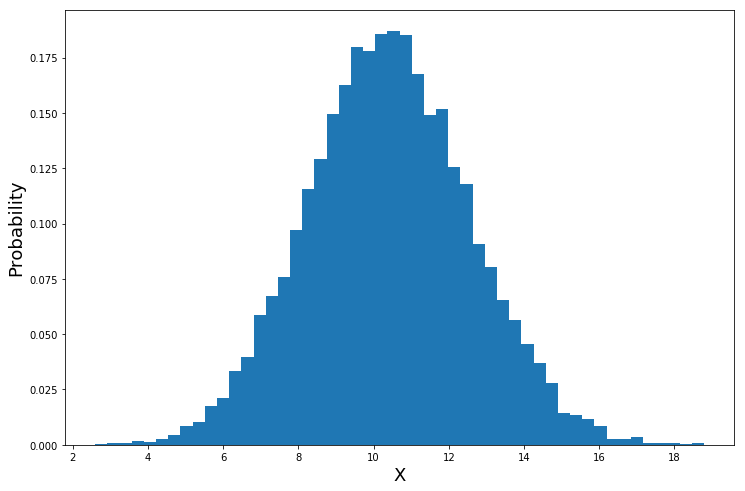

In [22]:
plt.figure(figsize=(12,8))
plt.hist(np.asarray([sample(0.2) for _ in range(10000)]),50,density=True)
plt.xlabel("X",fontsize=18)
plt.ylabel("Probability",fontsize=18)
plt.show()

The null hypothesis is that the $X$ is a Gaussian random variable with mean 10, the variance of this distribution is given as 4.The code given below allows us to vary the number of samples and calculate the p-values, for different cases of alternate hypothesis. Observe how the p-value changes with the number of samples.

In [23]:
def Z_test(n,test_type):
    samples = np.asarray([sample(0.2) for _ in range(n)])
    sample_mean = np.mean(samples)
    print("Sample mean:{:.4f}".format(sample_mean))
    mean = 10
    sigma = 2
    z = (sample_mean - mean)*np.sqrt(n)/sigma
    print("z-score:{:.4f}".format(z))
    if test_type=="μ > μ under null hypothesis":
        p = 1 - norm.cdf(z)
        print("p-value: {:.6f}".format(p))
    #elif test_type=="μ < μ under null hypothesis":
     #   p = norm.cdf(z)
      #  print("p-value : {}".format(p))
    elif test_type=="μ ≠ μ under null hypothesis":
        p = 2*(1-norm.cdf(np.abs(z)))
        print("p-value: {}".format(p))

w_opt = widgets.Dropdown(
    options=["μ > μ under null hypothesis","μ < μ under null hypothesis","μ ≠ μ under null hypothesis"],
    description = "Test type"
    )
w_n = widgets.IntSlider(value = 20, min = 10, max = 1000, step = 10)
v = widgets.interact(Z_test,n=w_n,test_type = w_opt)
display(v)

interactive(children=(IntSlider(value=20, description='n', max=1000, min=10, step=10), Dropdown(description='T…

<function __main__.Z_test(n, test_type)>

## T-Test

We do the same test, but now assume that we do not know the variance beforehand, so we use the t-statistic. Observe how the p-values change with the number of samples.

In [24]:
def T_test(n,test_type):
    samples = np.asarray([sample(0.2) for _ in range(n)])
    sample_mean = np.mean(samples)
    S = np.std(samples,ddof=1)
    print("Sample mean:{:.4f}".format(sample_mean))
    mean = 10
    t_score = (sample_mean - mean)*np.sqrt(n)/S
    print("t-score:{:.4f}".format(t_score))
    if test_type=="μ > μ under null hypothesis":
        p = 1 - t.cdf(t_score,n-1)
        print("p-value: {:.6f}".format(p))
    # elif test_type=="μ < μ under null hypothesis":
    #    p = t.cdf(t_score,n-1)
    #    print("p-value : {}".format(p))
    elif test_type=="μ ≠ μ under null hypothesis":
        p = 2*(1-t.cdf(np.abs(t_score,n-1)))
        print("p-value: {}".format(p))

w_opt = widgets.Dropdown(
    options=["μ > μ under null hypothesis","μ < μ under null hypothesis","μ ≠ μ under null hypothesis"],
    description = "Test type"
    )
w_n = widgets.IntSlider(value = 20, min = 10, max = 1000, step = 10)
v = widgets.interact(T_test,n=w_n,test_type = w_opt)
display(v)

interactive(children=(IntSlider(value=20, description='n', max=1000, min=10, step=10), Dropdown(description='T…

<function __main__.T_test(n, test_type)>